In [1]:
from datascience import *
import numpy as np

In [14]:
import pandas as pd
greenhouse = pd.read_excel('ghgp_data_by_year.xlsx',engine='openpyxl')
greenhouse = greenhouse.dropna()
greenhouse

,Summary data collected by the Greenhouse Gas Reporting Program,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
2,Facility Id,FRS Id,Facility Name,City,State,Zip Code,Address,County,Latitude,Longitude,...,2020 Total reported direct emissions,2019 Total reported direct emissions,2018 Total reported direct emissions,2017 Total reported direct emissions,2016 Total reported direct emissions,2015 Total reported direct emissions,2014 Total reported direct emissions,2013 Total reported direct emissions,2012 Total reported direct emissions,2011 Total reported direct emissions
3,1004377,110043803578,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,75454,3820 SAM RAYBURN HIGHWAY,COLLIN COUNTY,33.29857,-96.53586,...,504064,518680.25,653854,250497.5,221014.75,199011.75,241883.5,289953.25,204000,194000
7,1000112,110019827286,23rd and 3rd,BROOKLYN,NY,11232,730 3rd Avenue,Kings,40.663,-74,...,60819.7,44658.384,70705.288,52698.656,66797.352,67399.252,40722.2,102599.22,68984.744,100591.828
11,1003742,110010392887,31st Street Landfill,WESTCHESTER,IL,60154,11700 W 31ST ST,COOK COUNTY,41.835129,-87.915924,...,100500.948,18925.4,31220.15,29026.8,120657.6,92696.6,120707.35,97467.5,87357.75,95113.25
15,1003188,110000599273,3M BROWNWOOD,BROWNWOOD,TX,76801,4501 HIGHWAY 377 SOUTH,BROWN COUNTY,31.671177,-98.996513,...,29359.64,30571.636,34432.42,36202.264,31773.48,36754.712,36419.864,34821.82,33671.924,37149.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8434,1003318,110023014003,ZYBACH CRYOGENIC PLANT,Briscoe,TX,79011,16475 FM 1046,WHEELER COUNTY,35.605,-100.148333,...,15072.952,34028.834,23974.266,29733.948,25010.326,54812.054,40266.614,56638.91,83978.982,58893.092
8435,1001308,110012534551,Zeeland Generating Station,ZEELAND,MI,49464,425 FAIRVIEW AVE,Ottawa,42.82,-85.9988,...,1780786.552,1735721.02,1370334.872,1342562.524,1696631.212,1465347.02,875180.356,617747.712,1263260.168,786899.532
8437,1000805,110021292260,Zion Energy Center,ZION,IL,60099,5701 NINTH ST,Lake,42.4776,-87.895,...,325679.418,395152.486,321472.988,271470.88,261586.278,82924.594,41118.262,70492.84,78032.512,66811.452
8438,1001464,110000759457,Zuni,DENVER,CO,80204,1335 ZUNI ST,Denver,39.7369,-105.0169,...,0,10870.86,16707.788,14363.196,19363.428,23648.012,23916.312,31493.184,28339.044,31193.236


In [25]:
gas = Table().read_table('new_gas.csv')
gas_reduced = gas.drop("FRS Id").drop("Address").drop("Latitude").drop("Longitude").drop("Primary NAICS Code").drop("Latest Reported Industry Type (subparts)").drop("Zip Code")
gas_reduced

Facility Id,Facility Name,City,State,County,Latest Reported Industry Type (sectors),2020 Total reported direct emissions,2019 Total reported direct emissions,2018 Total reported direct emissions,2017 Total reported direct emissions,2016 Total reported direct emissions,2015 Total reported direct emissions,2014 Total reported direct emissions,2013 Total reported direct emissions,2012 Total reported direct emissions,2011 Total reported direct emissions
1004377,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,COLLIN COUNTY,Waste,"504,064.00","518,680.25","653,854.00","250,497.50","221,014.75","199,011.75","241,883.50","289,953.25","204,000.00","194,000.00"
1010040,15-18565/15-18662,Hazard,KY,PERRY COUNTY,Other,nan,nan,"125,981.75","218,699.25","141,439.50","118,204.50","225,708.25","306,680.75","348,450.75","390,393.50"
1010085,15-19015,Hazard,KY,PERRY COUNTY,Other,nan,nan,"93,918.75","70,265.00","35,907.00","55,872.50","68,761.00","57,767.00","41,513.00","64,664.50"
1012147,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,nan,"Natural Gas and Natural Gas Liquids Suppliers,Petroleum ...",nan,nan,"3,564.14","9,298.92","10,208.06",nan,nan,nan,nan,nan
1000112,23rd and 3rd,BROOKLYN,NY,Kings,Power Plants,"60,819.70","44,658.38","70,705.29","52,698.66","66,797.35","67,399.25","40,722.20","102,599.22","68,984.74","100,591.83"
1006394,29-6 #2 Central Delivery Point,Blanco,NM,Rio Arriba,Petroleum and Natural Gas Systems,nan,nan,nan,nan,nan,"15,391.59","15,353.19","14,576.79","10,872.56","19,389.57"
1002885,30-5 Central Delivery Point Compressor Station,Aztec,NM,Rio Arriba,Petroleum and Natural Gas Systems,nan,nan,nan,nan,nan,"22,506.52","21,883.57","22,329.72","26,701.30","36,223.16"
1002707,31-6 Central Delivery Point,BLOOMFIELD,NM,Rio Arriba,Petroleum and Natural Gas Systems,nan,nan,nan,nan,nan,"52,646.75","62,914.16","68,228.44","66,669.84","66,286.81"
1003742,31st Street Landfill,WESTCHESTER,IL,COOK COUNTY,Waste,"100,500.95","18,925.40","31,220.15","29,026.80","120,657.60","92,696.60","120,707.35","97,467.50","87,357.75","95,113.25"
1002718,32-7 Central Delivery Point,BLANCO,NM,SAN JUAN,Petroleum and Natural Gas Systems,nan,nan,nan,nan,nan,"33,654.12","40,757.10","41,751.09","49,092.72","52,001.80"


In [35]:
gas_2020 = gas_reduced.sort("2020 Total reported direct emissions", descending = True).where("2020 Total reported direct emissions", are.not_equal_to("nan"))
gas_2020_1 = gas_2020.select(0,1,2,3,4,5,6)
gas_2020_1

Facility Id,Facility Name,City,State,County,Latest Reported Industry Type (sectors),2020 Total reported direct emissions
1001197,North Valmy,VALMY,NV,Humboldt,Power Plants,"997,249.07"
1000483,Colorado Bend I,WHARTON,TX,Wharton,Power Plants,"993,372.12"
1000764,Ravenswood Generating Station,LONG ISLAND CITY,NY,Queens,Power Plants,"992,067.32"
1000870,Brooklyn Navy Yard Cogeneration Project,Brooklyn,NY,KINGS COUNTY,Power Plants,"990,821.27"
1005699,NCSU CENTRAL HEAT PLANT,RALEIGH,NC,WAKE COUNTY,Other,"99,958.12"
1013877,New Orleans Power Station,New Orleans,LA,ORLEANS PARISH,Power Plants,"99,913.82"
1013193,Rover - Mainline CS #2,Wooster,OH,WAYNE COUNTY,Petroleum and Natural Gas Systems,"99,832.79"
1012375,"Granges Americas, Inc",Huntingdon,TN,CARROLL COUNTY,Metals,"99,663.07"
1002351,CITY OF CORSICANA LANDFILL,CORSICANA,TX,NAVARRO COUNTY,Waste,"99,634.25"
1005759,"Cree, Inc",Durham,NC,DURHAM COUNTY,Other,"99,631.80"


In [52]:
for_hist = gas_2020_1.select("State", "2020 Total reported direct emissions")
for_hist.barh("State", "2020 Total reported direct emissions")

ValueError: The column '2020 Total reported direct emissions' contains non-numerical values. A plot cannot be drawn for this column.

In [56]:
gas_data = gas_2020_1.column("2020 Total reported direct emissions").astype(float)
gas_avg = np.average(gas_data)

ValueError: could not convert string to float: '997,249.07'

In [54]:
type(gas_2020_1.column("2020 Total reported direct emissions").item(0))

str

In [73]:
values_2020 = gas_2020_1.column("2020 Total reported direct emissions")
float_array = make_array()
for number in values_2020:
    float_array = np.append(float_array, float(number.replace(',','')))  
float_array

array([ 997249.07,  993372.12,  992067.32, ...,       0.  ,       0.  ,
             0.  ])

In [74]:
fixed_gas_2020 = gas_2020_1.drop("2020 Total reported direct emissions").with_column(c, float_array)
fixed_gas_2020

Facility Id,Facility Name,City,State,County,Latest Reported Industry Type (sectors),2020 Total reported direct emissions
1001197,North Valmy,VALMY,NV,Humboldt,Power Plants,997249
1000483,Colorado Bend I,WHARTON,TX,Wharton,Power Plants,993372
1000764,Ravenswood Generating Station,LONG ISLAND CITY,NY,Queens,Power Plants,992067
1000870,Brooklyn Navy Yard Cogeneration Project,Brooklyn,NY,KINGS COUNTY,Power Plants,990821
1005699,NCSU CENTRAL HEAT PLANT,RALEIGH,NC,WAKE COUNTY,Other,99958.1
1013877,New Orleans Power Station,New Orleans,LA,ORLEANS PARISH,Power Plants,99913.8
1013193,Rover - Mainline CS #2,Wooster,OH,WAYNE COUNTY,Petroleum and Natural Gas Systems,99832.8
1012375,"Granges Americas, Inc",Huntingdon,TN,CARROLL COUNTY,Metals,99663.1
1002351,CITY OF CORSICANA LANDFILL,CORSICANA,TX,NAVARRO COUNTY,Waste,99634.2
1005759,"Cree, Inc",Durham,NC,DURHAM COUNTY,Other,99631.8


In [83]:
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

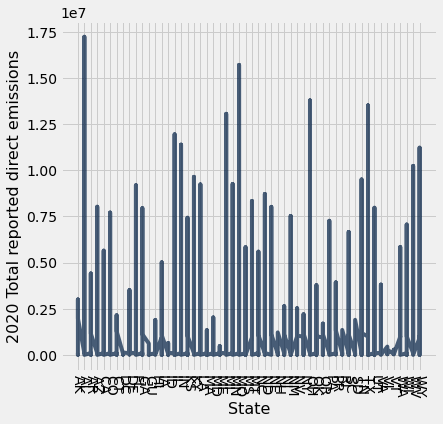

In [229]:
fixed_gas_2020.select("State", "2020 Total reported direct emissions").plot("State")
plots.xticks(rotation = 270);

In [91]:
fixed_gas_2020.group("State")

State,count
AK,63
AL,172
AR,99
AZ,89
CA,376
CO,112
CT,40
DC,4
DE,19
FL,173


In [175]:
gas_all_years = gas_reduced.where("2020 Total reported direct emissions", are.not_equal_to("nan")).where("2019 Total reported direct emissions", are.not_equal_to("nan")).where("2018 Total reported direct emissions", are.not_equal_to("nan")).where("2017 Total reported direct emissions", are.not_equal_to("nan")).where("2016 Total reported direct emissions", are.not_equal_to("nan")).where("2015 Total reported direct emissions", are.not_equal_to("nan")).where("2014 Total reported direct emissions", are.not_equal_to("nan")).where("2013 Total reported direct emissions", are.not_equal_to("nan")).where("2012 Total reported direct emissions", are.not_equal_to("nan")).where("2011 Total reported direct emissions", are.not_equal_to("nan"))
gas_all_years
values_2020 = gas_all_years.column("2020 Total reported direct emissions")
values_2019 = gas_all_years.column("2019 Total reported direct emissions")
values_2018 = gas_all_years.column("2018 Total reported direct emissions")
values_2017 = gas_all_years.column("2017 Total reported direct emissions")
values_2016 = gas_all_years.column("2016 Total reported direct emissions")
values_2015 = gas_all_years.column("2015 Total reported direct emissions")
values_2014 = gas_all_years.column("2014 Total reported direct emissions")
values_2013 = gas_all_years.column("2013 Total reported direct emissions")
values_2012 = gas_all_years.column("2012 Total reported direct emissions")
values_2011 = gas_all_years.column("2011 Total reported direct emissions")
array_2020 = make_array()
array_2019 = make_array()
array_2018 = make_array()
array_2017 = make_array()
array_2016 = make_array()
array_2015 = make_array()
array_2014 = make_array()
array_2013 = make_array()
array_2012 = make_array()
array_2011 = make_array()
for number in values_2020:
    array_2020 = np.append(array_2020, float(number.replace(',','')))  
for number in values_2019:
    array_2019 = np.append(array_2019, float(number.replace(',','')))
for number in values_2018:
    array_2018 = np.append(array_2018, float(number.replace(',','')))
for number in values_2017:
    array_2017 = np.append(array_2017, float(number.replace(',','')))
for number in values_2016:
    array_2016 = np.append(array_2016, float(number.replace(',','')))
for number in values_2015:
    array_2015 = np.append(array_2015, float(number.replace(',','')))
for number in values_2014:
    array_2014 = np.append(array_2014, float(number.replace(',','')))
for number in values_2013:
    array_2013 = np.append(array_2013, float(number.replace(',','')))
for number in values_2012:
    array_2012 = np.append(array_2012, float(number.replace(',','')))
for number in values_2011:
    array_2011 = np.append(array_2011, float(number.replace(',','')))
fixed_gas_all_years = gas_all_years.drop(6).drop(6).drop(6).drop(6).drop(6).drop(6).drop(6).drop(6).drop(6).drop(6).with_column("2020 Total reported direct emissions", array_2020).with_column("2019 Total reported direct emissions", array_2019).with_column("2018 Total reported direct emissions", array_2018).with_column("2017 Total reported direct emissions", array_2017).with_column("2016 Total reported direct emissions", array_2016).with_column("2015 Total reported direct emissions", array_2015).with_column("2014 Total reported direct emissions", array_2014).with_column("2013 Total reported direct emissions", array_2013).with_column("2012 Total reported direct emissions", array_2012).with_column("2011 Total reported direct emissions", array_2011)
fixed_gas_all_years

Facility Id,Facility Name,City,State,County,Latest Reported Industry Type (sectors),2020 Total reported direct emissions,2019 Total reported direct emissions,2018 Total reported direct emissions,2017 Total reported direct emissions,2016 Total reported direct emissions,2015 Total reported direct emissions,2014 Total reported direct emissions,2013 Total reported direct emissions,2012 Total reported direct emissions,2011 Total reported direct emissions
1004377,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,COLLIN COUNTY,Waste,504064,518680,653854,250498,221015,199012,241884,289953,204000,194000
1000112,23rd and 3rd,BROOKLYN,NY,Kings,Power Plants,60819.7,44658.4,70705.3,52698.7,66797.4,67399.2,40722.2,102599,68984.7,100592
1003742,31st Street Landfill,WESTCHESTER,IL,COOK COUNTY,Waste,100501,18925.4,31220.2,29026.8,120658,92696.6,120707,97467.5,87357.8,95113.2
1003188,3M BROWNWOOD,BROWNWOOD,TX,BROWN COUNTY,Minerals,29359.6,30571.6,34432.4,36202.3,31773.5,36754.7,36419.9,34821.8,33671.9,37149.4
1005043,3M CO,MAPLEWOOD,MN,RAMSEY COUNTY,Other,82308.2,106258,104996,76595.4,79174,79440.1,81855.4,80335.2,72407,76373.4
1003739,3M CO - GUIN,GUIN,AL,MARION COUNTY,Minerals,27083,29770.9,28622.3,25134,18948,31694.6,33684.3,32082.2,31178.8,29977.6
1007698,3M CO - WAUSAU DOWNTOWN,WAUSAU,WI,MARATHON COUNTY,Other,46909.1,45435.2,40427.1,42620.9,36574.1,22926.7,26667,29429.5,27702.3,28388.5
1004206,3M COMPANY,DECATUR,AL,MORGAN COUNTY,"Chemicals,Industrial Gas Suppliers",44016.3,46652.1,48998.5,47331.5,48267.9,47000.3,53024.9,58214.7,57279.5,60442.7
1006665,3M CORDOVA,CORDOVA,IL,ROCK ISLAND COUNTY,"Chemicals,Industrial Gas Suppliers",657866,766972,723398,713888,697084,889485,1.23036e+06,2.28907e+06,1.48553e+06,1.38076e+06
1004836,3M Cottage Grove Center - Site,Cottage Grove,MN,WASHINGTON COUNTY,"Chemicals,Industrial Gas Suppliers,Minerals",49540.3,32126.5,40325.9,33796.9,41687.8,45416.3,66306.6,64664.1,56199,73653.2


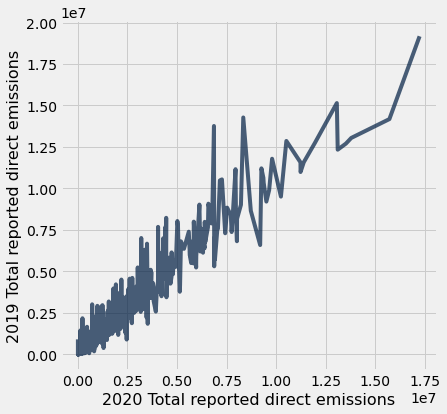

In [132]:
fixed_gas_all_years.plot("2020 Total reported direct emissions", "2019 Total reported direct emissions")

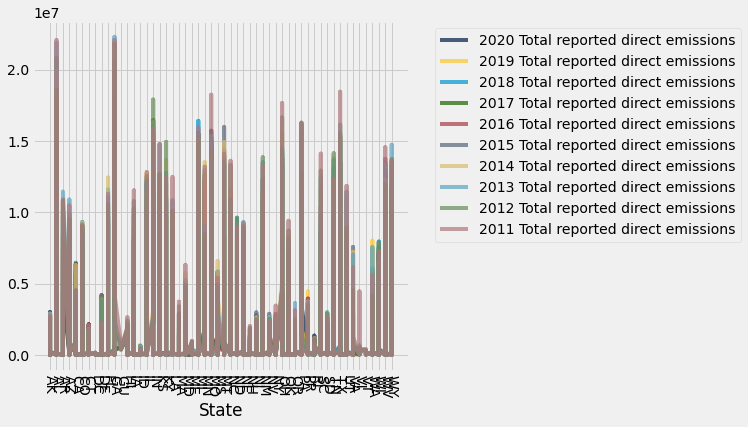

In [228]:
fixed_gas_all_years.plot("State", ["2020 Total reported direct emissions", "2019 Total reported direct emissions", "2018 Total reported direct emissions", "2017 Total reported direct emissions", "2016 Total reported direct emissions", "2015 Total reported direct emissions", "2014 Total reported direct emissions", "2013 Total reported direct emissions", "2012 Total reported direct emissions", "2011 Total reported direct emissions"])
plots.xticks(rotation = 270);

In [137]:
max(array_2011)

22073646.079999998

C:\Users\Davyd Voloshyn\Anaconda3\lib\site-packages\datascience\tables.py:5865: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


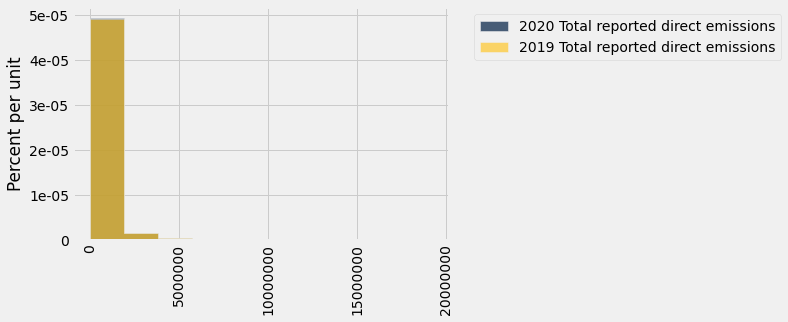

In [167]:
fixed_gas_all_years.hist("2020 Total reported direct emissions", "2019 Total reported direct emissions")

In [174]:
fixed_gas_all_years.to_csv('C://Users/Davyd Voloshyn/Downloads')

PermissionError: [Errno 13] Permission denied: 'C:/Users/Davyd Voloshyn/Downloads'

In [180]:
t2020_and_2019 = fixed_gas_all_years
t2020_and_2019

Facility Id,Facility Name,City,State,County,Latest Reported Industry Type (sectors),2020 Total reported direct emissions,2019 Total reported direct emissions,2018 Total reported direct emissions,2017 Total reported direct emissions,2016 Total reported direct emissions,2015 Total reported direct emissions,2014 Total reported direct emissions,2013 Total reported direct emissions,2012 Total reported direct emissions,2011 Total reported direct emissions
1004377,121 REGIONAL DISPOSAL FACILITY,MELISSA,TX,COLLIN COUNTY,Waste,504064,518680,653854,250498,221015,199012,241884,289953,204000,194000
1000112,23rd and 3rd,BROOKLYN,NY,Kings,Power Plants,60819.7,44658.4,70705.3,52698.7,66797.4,67399.2,40722.2,102599,68984.7,100592
1003742,31st Street Landfill,WESTCHESTER,IL,COOK COUNTY,Waste,100501,18925.4,31220.2,29026.8,120658,92696.6,120707,97467.5,87357.8,95113.2
1003188,3M BROWNWOOD,BROWNWOOD,TX,BROWN COUNTY,Minerals,29359.6,30571.6,34432.4,36202.3,31773.5,36754.7,36419.9,34821.8,33671.9,37149.4
1005043,3M CO,MAPLEWOOD,MN,RAMSEY COUNTY,Other,82308.2,106258,104996,76595.4,79174,79440.1,81855.4,80335.2,72407,76373.4
1003739,3M CO - GUIN,GUIN,AL,MARION COUNTY,Minerals,27083,29770.9,28622.3,25134,18948,31694.6,33684.3,32082.2,31178.8,29977.6
1007698,3M CO - WAUSAU DOWNTOWN,WAUSAU,WI,MARATHON COUNTY,Other,46909.1,45435.2,40427.1,42620.9,36574.1,22926.7,26667,29429.5,27702.3,28388.5
1004206,3M COMPANY,DECATUR,AL,MORGAN COUNTY,"Chemicals,Industrial Gas Suppliers",44016.3,46652.1,48998.5,47331.5,48267.9,47000.3,53024.9,58214.7,57279.5,60442.7
1006665,3M CORDOVA,CORDOVA,IL,ROCK ISLAND COUNTY,"Chemicals,Industrial Gas Suppliers",657866,766972,723398,713888,697084,889485,1.23036e+06,2.28907e+06,1.48553e+06,1.38076e+06
1004836,3M Cottage Grove Center - Site,Cottage Grove,MN,WASHINGTON COUNTY,"Chemicals,Industrial Gas Suppliers,Minerals",49540.3,32126.5,40325.9,33796.9,41687.8,45416.3,66306.6,64664.1,56199,73653.2


In [184]:
changes2020_2019 = np.average(abs(t2020_and_2019.column(6) - t2020_and_2019.column(7)))
changes2020_2019

79072.238029100525

In [186]:
only_values = fixed_gas_all_years.drop(0).drop(0).drop(0).drop(0).drop(0).drop(0)
only_values

2020 Total reported direct emissions,2019 Total reported direct emissions,2018 Total reported direct emissions,2017 Total reported direct emissions,2016 Total reported direct emissions,2015 Total reported direct emissions,2014 Total reported direct emissions,2013 Total reported direct emissions,2012 Total reported direct emissions,2011 Total reported direct emissions
504064,518680,653854,250498,221015,199012,241884,289953,204000,194000
60819.7,44658.4,70705.3,52698.7,66797.4,67399.2,40722.2,102599,68984.7,100592
100501,18925.4,31220.2,29026.8,120658,92696.6,120707,97467.5,87357.8,95113.2
29359.6,30571.6,34432.4,36202.3,31773.5,36754.7,36419.9,34821.8,33671.9,37149.4
82308.2,106258,104996,76595.4,79174,79440.1,81855.4,80335.2,72407,76373.4
27083,29770.9,28622.3,25134,18948,31694.6,33684.3,32082.2,31178.8,29977.6
46909.1,45435.2,40427.1,42620.9,36574.1,22926.7,26667,29429.5,27702.3,28388.5
44016.3,46652.1,48998.5,47331.5,48267.9,47000.3,53024.9,58214.7,57279.5,60442.7
657866,766972,723398,713888,697084,889485,1.23036e+06,2.28907e+06,1.48553e+06,1.38076e+06
49540.3,32126.5,40325.9,33796.9,41687.8,45416.3,66306.6,64664.1,56199,73653.2


In [189]:
avg_diff_12_11 = np.average(only_values.column(9) - only_values.column(8))
avg_diff_12_11

16805.90867913832

In [191]:
total_diff_12_11 = sum(only_values.column(9)) - sum(only_values.column(8))
total_diff_12_11

88936868.72999239

In [217]:
def avg_diff(table, column1, column2):
    return np.average(table.column(column1) - table.column(column2))
def change_diff(table, column1, column2):
    return sum(table.column(column1)) / sum(table.column(column2))

In [218]:
average_difference = make_array()
average_difference = np.append(average_difference, avg_diff(only_values, 0, 1))
average_difference = np.append(average_difference, avg_diff(only_values, 1, 2))
average_difference = np.append(average_difference, avg_diff(only_values, 2, 3))
average_difference = np.append(average_difference, avg_diff(only_values, 3, 4))
average_difference = np.append(average_difference, avg_diff(only_values, 4, 5))
average_difference = np.append(average_difference, avg_diff(only_values, 5, 6))
average_difference = np.append(average_difference, avg_diff(only_values, 6, 7))
average_difference = np.append(average_difference, avg_diff(only_values, 7, 8))
average_difference = np.append(average_difference, avg_diff(only_values, 8, 9))

In [219]:
differences = make_array()
differences = np.append(differences, change_diff(only_values, 0, 1))
differences = np.append(differences, change_diff(only_values, 1, 2))
differences = np.append(differences, change_diff(only_values, 2, 3))
differences = np.append(differences, change_diff(only_values, 3, 4))
differences = np.append(differences, change_diff(only_values, 4, 5))
differences = np.append(differences, change_diff(only_values, 5, 6))
differences = np.append(differences, change_diff(only_values, 6, 7))
differences = np.append(differences, change_diff(only_values, 7, 8))
differences = np.append(differences, change_diff(only_values, 8, 9))

In [226]:
Stats = Table().with_column("Total Change of Gas Emissions in percentages", differences).with_column("Average Differences in Gas Emissions", average_difference)
Stats = Stats.with_column("Years", make_array("2020-2019", "2019-2018", "2018-2017", "2017-2016", "2016-2015", "2015-2014", "2014-2013", "2013-2012", "2012-2011")) 

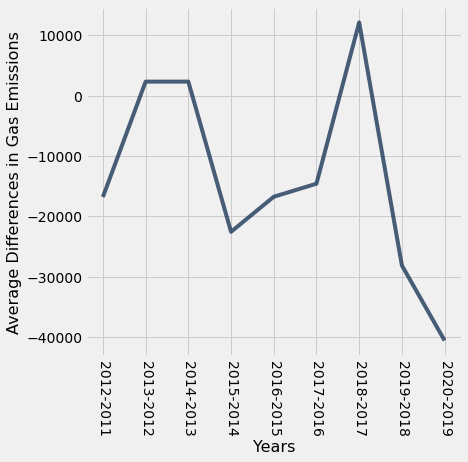

In [230]:
Stats.plot("Years", "Average Differences in Gas Emissions")
plots.xticks(rotation = 270);

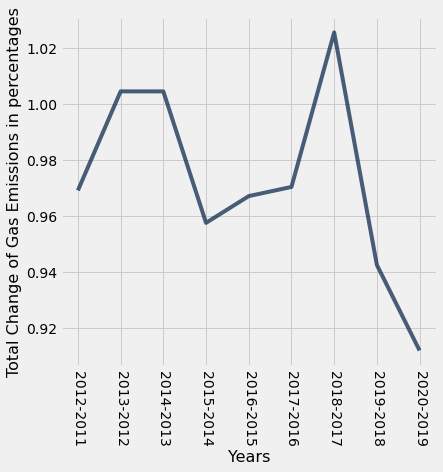

In [237]:
Stats.plot("Years", "Total Change of Gas Emissions in percentages")
plots.xticks(rotation = 270);

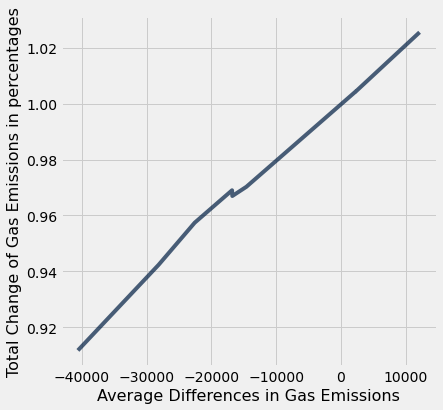

In [238]:
Stats.plot("Average Differences in Gas Emissions", "Total Change of Gas Emissions in percentages")

In [239]:
Stats

Total Change of Gas Emissions in percentages,Average Differences in Gas Emissions,Years
0.911774,-40590.4,2020-2019
0.942372,-28134,2019-2018
1.02548,12129.5,2018-2017
0.970244,-14600.6,2017-2016
0.966964,-16763.6,2016-2015
0.957409,-22574,2015-2014
1.00439,2319.18,2014-2013
1.00441,2314.65,2013-2012
0.969003,-16805.9,2012-2011


In [260]:
obv_stats = Table().with_column("Year", make_array("2020", "2019", "2018", "2017", "2016", "2015", "2014", "2013", "2012", "2011")).with_column("Gas emissions", make_array(sum(only_values.column(0)),sum(only_values.column(1)),sum(only_values.column(2)),sum(only_values.column(3)),sum(only_values.column(4)),sum(only_values.column(5)),sum(only_values.column(6)),sum(only_values.column(7)),sum(only_values.column(8)),sum(only_values.column(9))))
obv_stats                                                                                                                                             

Year,Gas emissions
2020,2.21989e+09
2019,2.43469e+09
2018,2.58358e+09
2017,2.51939e+09
2016,2.59666e+09
2015,2.68537e+09
2014,2.80483e+09
2013,2.79256e+09
2012,2.78031e+09
2011,2.86924e+09


In [263]:
obv_stats1 = Table().with_column("Year", obv_stats.apply(int, "Year")).with_column("Gas emissions", obv_stats.column(1))
obv_stats1

Year,Gas emissions
2020,2.21989e+09
2019,2.43469e+09
2018,2.58358e+09
2017,2.51939e+09
2016,2.59666e+09
2015,2.68537e+09
2014,2.80483e+09
2013,2.79256e+09
2012,2.78031e+09
2011,2.86924e+09


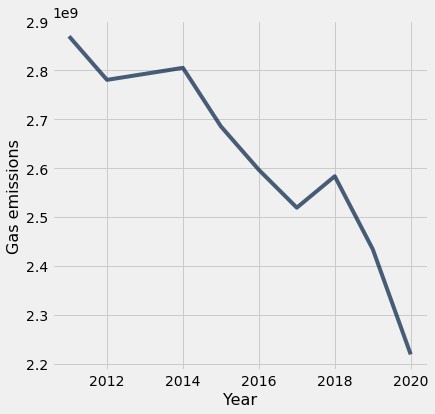

In [266]:
obv_stats1.plot("Year")

In [272]:
import random
only_values

2020 Total reported direct emissions,2019 Total reported direct emissions,2018 Total reported direct emissions,2017 Total reported direct emissions,2016 Total reported direct emissions,2015 Total reported direct emissions,2014 Total reported direct emissions,2013 Total reported direct emissions,2012 Total reported direct emissions,2011 Total reported direct emissions
504064,518680,653854,250498,221015,199012,241884,289953,204000,194000
60819.7,44658.4,70705.3,52698.7,66797.4,67399.2,40722.2,102599,68984.7,100592
100501,18925.4,31220.2,29026.8,120658,92696.6,120707,97467.5,87357.8,95113.2
29359.6,30571.6,34432.4,36202.3,31773.5,36754.7,36419.9,34821.8,33671.9,37149.4
82308.2,106258,104996,76595.4,79174,79440.1,81855.4,80335.2,72407,76373.4
27083,29770.9,28622.3,25134,18948,31694.6,33684.3,32082.2,31178.8,29977.6
46909.1,45435.2,40427.1,42620.9,36574.1,22926.7,26667,29429.5,27702.3,28388.5
44016.3,46652.1,48998.5,47331.5,48267.9,47000.3,53024.9,58214.7,57279.5,60442.7
657866,766972,723398,713888,697084,889485,1.23036e+06,2.28907e+06,1.48553e+06,1.38076e+06
49540.3,32126.5,40325.9,33796.9,41687.8,45416.3,66306.6,64664.1,56199,73653.2


In [301]:
Table_of_columns = Table().with_column("Columns", make_array(0,1,2,3,4,5,6,7,8,9))
Table_of_columns
random_column = Table_of_columns.sample(with_replacement=False).item(0)

In [303]:
random_column

Columns
9
5
0
2
8
7
6
1
3
4


In [313]:
new_avg = make_array()
for i in np.arange(1000):
    avges = avg_diff(only_values, Table_of_columns.sample(with_replacement=False).column(0).item(0), Table_of_columns.sample(with_replacement=False).column(0).item(1))
    new_avg = np.append(new_avg, avges)

Observed Difference: -40590.4


C:\Users\Davyd Voloshyn\Anaconda3\lib\site-packages\datascience\tables.py:5865: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


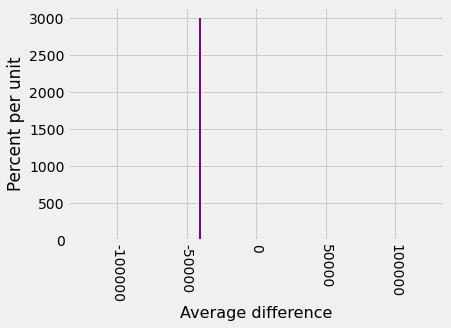

In [314]:
obs_value = -40590.4
Table().with_column('Average difference', new_avg).hist()
print('Observed Difference:', obs_value)
plots.plot([obs_value, obs_value], [0, 30], color='purple', lw=2);
plots.xticks(rotation = 270);

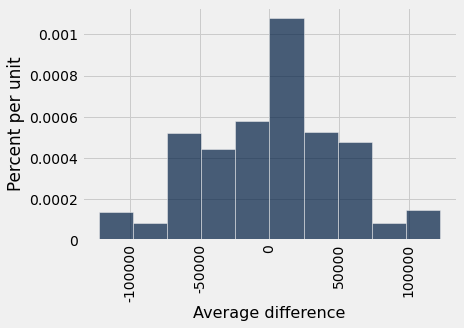

In [321]:
Table().with_column('Average difference', new_avg).hist()

In [324]:
Stats

Total Change of Gas Emissions in percentages,Average Differences in Gas Emissions,Years
0.911774,-40590.4,2020-2019
0.942372,-28134,2019-2018
1.02548,12129.5,2018-2017
0.970244,-14600.6,2017-2016
0.966964,-16763.6,2016-2015
0.957409,-22574,2015-2014
1.00439,2319.18,2014-2013
1.00441,2314.65,2013-2012
0.969003,-16805.9,2012-2011
